### 정형 데이터 & 비정형 데이터
* 정형 데이터 : 구조가 있는 데이터. 예) csv, 데이터베이스, 엑셀
* 비정형 데이터 : 위와 같은 구조로 표현되기 어려운 데이터들. 예) 텍스트 데이터, 사진, 음악 등...
    - 비교적 양이 많고 사이즈가 크다!
    - 규칙성을 찾기 어렵기 때문에 전통적 머신러닝 방법으로 모델을 만들기 어렵다. ==> 신경망 알고리즘을 씀

지금까지 배운 머신러닝 알고리즘은 정형 데이터에 적합한 방법들!
! 정형 데이터를 다루는 가장 뛰어난 성과를 내는 알고리즘이 **앙상블 학습** !

## 앙상블 학습
: 대부분 결정 트리를 기반
    - 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 방법 
    - 목표 : 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것 <br> <br>
<특징>
* 단일 모델의 약점을 다수의 모델들을 결합하여 보완
* 뛰어난 성능을 가진 모델들도만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능에 도움이 될 수
* 오버피팅은 막고, 장점인 직관적인 분류기준은 강화

<유형>
: Voting, Bagging, Boosting <br>
대표적인 배깅 : rf, 부스팅은 에이다, 그래디언트 <br>
분류나 회귀에서 gbm?

### 랜덤 포레스트 (Random Forest)
    - 결정트리처럼 특성 중요도를 제공
    - 각 트리의 특성 중요도 취합
    - 랜덤 포레스트 에서 제공하는 특성 중요도가 단일 dt에서 제공하는 것보다 신뢰성이 높다

랜덤포레스트는 각 트리를 훈련하기 위해 데이터를 랜덤하게 만든다. --> 훈련 데이터에서 랜덤하게 샘플 추출
* 부트스트랩 샘플 : 데이터 세트에서 중복을 허용하여 데이터를 샘플링.
    - OOB (Out Of Bag) : 부트스트랩 샘플에 포함되지 않고 남은 샘플. 검증 세트의 역할을 함. oob_score=True로 설정하면 각 결정 트리의 평균 OOB점수를 출력
* 각 노드를 분할할 때, 특성을 무작위로 고른 후, 최선의 분할을 찾는데 RF는 전체 특성 개수의 제곱근만큼 특성을 선택 <br>
    - 랜덤하게 선택된 샘플과 특성 : 훈련세트에 과대적합되는 것을 방지하고 검증세트와 테스트 세트에서 안정적인 성능을 얻을 수 있다<br>

==> 분류 : 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측<br>
==> 회귀 : 각 트리의 예측을 평균

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

wine = pd.read_csv('http://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [4]:
# return_train_score = True는 검증 점수 뿐만 아니라 훈련 세트에 대한 점수도 같이
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [5]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


alcohol : 0.232
sugar : 0.500
pH : 0.268


<Axes: >

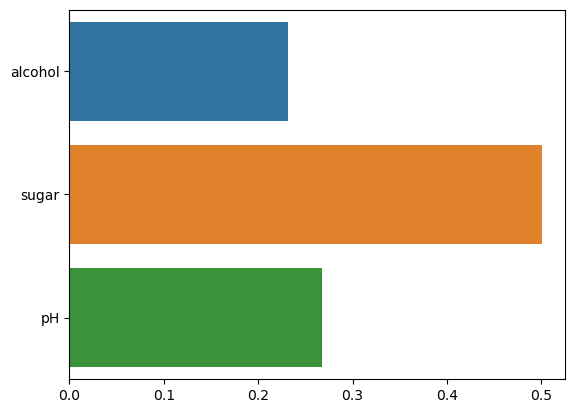

In [6]:
import seaborn as sns
feature_names = ['alcohol', 'sugar', 'pH']
# feature별 importance제공
for name, value in zip(feature_names, rf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
#feature importance를 column별로 시각화
sns.barplot(x = rf.feature_importances_, y = feature_names)

In [7]:
# out of bag 샘플 (검증 세트의 역할) - oob_score = True
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
print(rf.oob_score_)

0.8934000384837406


#### 장단점과 매개변수
* 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.
* 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며, 데이터의 스케일을 맞출 필요도 없다.
* 기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하는 장점은 가지고 있다.
* 대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬 처리할 수있다.
* n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할  수 있다.
(n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.)

### 엑스트라 트리
    - 부트 스트랩 샘플을 사용하지 않는다
    - 각 결정 트리를 만들 때 전체 샘플 사용
    - 노드 분할시 가장 좋은 분할을 찾는 것이 아니라 무작위 분할
    - 무작위 분할하므로 성능은 낮아지지만, 많은 트리를 앙상블
    - ==> 과대 적합을 막고 검증세트의 점수를 높이는 효과가 있다

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [9]:
et.fit(X_train, y_train)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


### 그래디언트 부스팅
: 경사 하강법을 사용하여 트리를 앙상블에 추가

* 그래디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 기법이다.
* 이름이 회귀지만 회귀/분류 모두 사용할 수 있다.
* 랜덤 포레스트와 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다. 기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없다.
* 대신 강력한 사전 가지치기가 사용된다.
* 그래디언트 부스팅 트리는 머신러닝 경연 대회에서 우승을 많이 차지하였고, 업계에서도 널리 사용된다.
* 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 높은 정확도를 제공해준다.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# !과대적합되지 않음!

0.8881086892152563 0.8720430147331015


In [12]:
# n_estimators = 500 : 트리를 500개 만듦. learning_rate = 0.2 : 학습률 (기본값 0.1)
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# !과대적합되었다!

0.9464595437171814 0.8780082549788999


In [13]:
gb.fit(X_train, y_train)
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


### 히스토그램 기반 그래디언트 부스팅
: 정형 데이터를 다루는 머신러닝 알고리즘 중 가장 인기가 많다. <br>
- 입력 특성을 256개의 구간으로 나눈다. ==> 노드 분할 시 최적의 분할을 빠르게 찾을 수 있다
- 256개 구간 중 하나를 떼어놓고 누락된 값을 위해 사용. ==> 누락값 전처리 필요 없음
- 트리 개수 지정 : max_iter

In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [17]:
# 특성 중요도 : permutation_importance() - importances, importances_mean, importances_std를 담고 있다.
# n_repeats=10 (기본값은 5)
from sklearn.inspection import permutation_importance
hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [18]:
hgb.score(X_test, y_test)

0.8723076923076923

### XGBoost vs LightGBM

In [20]:
# tree_method = 'hist' : 히스토그램 매개변수
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores= cross_validate(xgb, X_train, y_train, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#### LightGBM 
- MS에서 만든 LightGBM --> 인기가 점점 높아지고 있는 모델

In [22]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
